**<h1><center>Méthodes de Monte Carlo</center></h1>**

**Rédacteurs :** JUNNE Jonathan (000441146) et MOL Louan (000440167)

# 1. Introduction

Dans ce travail nous répondrons aux "questions challenge" du module 6.

Nous introduisons dès à présent les librairies que nous utiliserons dans la suite.

In [62]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

Nous détaillerons l'utilisation de chacune d'entre elles le moment voulu.

# 2. Nombres aléatoires

Python possède beacoup de générateurs de nombres aléatoires différents. Dans le MOOC

## 2.1 Comparaison distribution inverse - random1

## 2.2 Comparaison distribution inverse - random2

## 2.3 Comparaison distribution inverse - random3

## 2.4 Distribution exponentielle

Même s'il est possible, à l'aide de numpy, de directement générer des nombres aléatoires selon une distribution exponetielle, il également possible de le faire à partir d'une distribution uniforme, comme vu dans le MOOC. Il peut-être interressant de comparer les résultats.

Commencons par la manière la plus simple, à savoir la méthode implémentée par numpy. En effet, ma fonction `random.exponential(alpha,n)` permet de générer `n` nombres aléatoires selon la distribution exponentielle de paramètre `alpha`($\alpha$). C'est-à-dire selon la distribution

$$
p(x)=
\begin{cases} 
\alpha e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} 
$$

Le code suivant permet d'afficher les apparitions (attention, l'histogramme est normé) de nombres tirés selon cette loi.

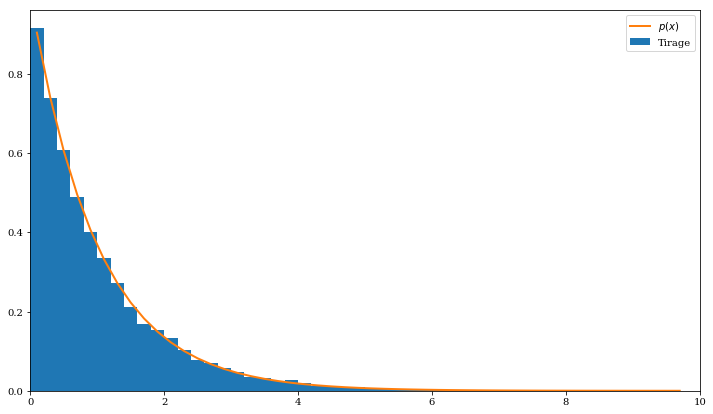

In [2]:
# Déclarations des constantes
alpha = 1
N = 10000

# Génération des N nombres aléatoires
x_1 = np.random.exponential(alpha,N)

# Histogramme
plt.figure(figsize=(12,7))
binwidth = 0.2
plt.xlim(0, 10)
bins=np.arange(0.0,10.0, binwidth)
plt.hist(x_1,bins,density = True,label="Tirage");

# Courbe théorique
xc = bins[:-1] + binwidth/2
plt.plot(xc,alpha*np.exp(-alpha*xc), lw=2,label = "$p(x)$")
plt.legend();

Nous allons maintenant générer une série de données suivant la même loi mais à partir des données uniformément distribuée. Pour cela nous utilisons la **méthode de la distribution inverse**. Cete méthode est bassée sur le fait que si $X$ est une variable distribuée uniforméménet sur l'interval $[0,1]$, alors $Y = F^{-1}(X)$ est une variable aléatoire de fonction cumulative $F$. La démonstration est dans le MOOC.

Dans notre cas, nous avons

$$F(x) = \int_{-\infty}^{x}p(x')dx' = \begin{cases} 
1 - e^{-\alpha x} &\mbox{for } x\geq 0 \\
0 &\mbox{if } x<0
\end{cases} $$

et donc

$$F^{-1}(x) = -\frac{1}{\alpha}\log(1-x).$$

Nous sommes donc près à générer nos données.

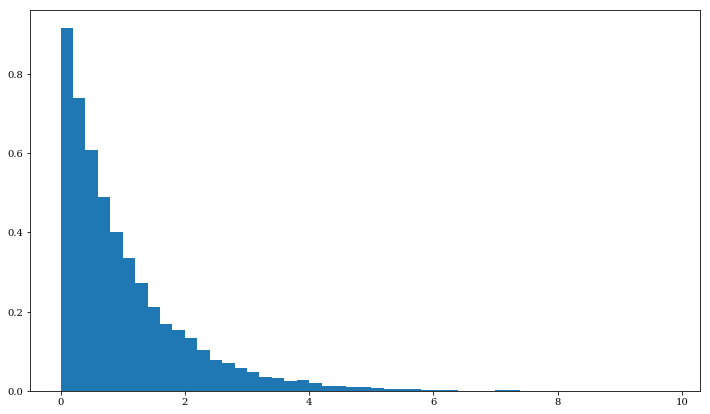

In [3]:
# Génération des données
x_uniform = np.random.random_sample(N)
x_2 = -1/alpha*np.log(1-x_uniform)

# Histogramme
plt.figure(figsize=(12,7))
plt.hist(x_1,bins,density = True,label="Tirage");

On voit directement que le résultat est proche du précédent. Il serait cependant mieux de pouvoir quantifier cette notion de "similarité" des résultats. Il y a plusieurs moyens de faire cela. Commencons par déterminer quelle méthode donne, l'espérance le plus proche de la valeur théorique. Pour une distribution exponentielle de paramètre $\alpha = 1$, 

$$E(Y) = \frac{1}{\alpha} = 1.$$

On peut alors, dès à présent, déterminer l'espérance des séries de données `x_1` et `x_2` à l'aide de la fonction `mean(x)` de numpy puis la comparer à la valeur ci-dessus. 

A ce stade, on pourrait avoir le raisonnement suivant : les résultats obtenus dépendront fortement du tirage en question. C'est-à-dire que les résultats pourront varier très fort entre plusieurs exécutions des cellules où `x_1` et `x_2` sont générées. Pour avoir un résultat plus significatif, nous pouvons procéder à `n_tirage` de `x_1`, calculer l'espérance de chacun de ces tirages et ainsi trouver une expérance moyenne qui pourra, elle, être comparée à l'espérance théorique.

Toutefois, augmenter le nombre de tirages reviens à augmenter le nombre de valeurs tirées d'un unique tirage. Ces deux manière de voir les choses sont strictement equivalentes mis à art du fait que la seconde est plus éfficace.

In [4]:
# Définition des constantes
N = 1000000
alpha = 1

# Tirages
x_1 = np.random.exponential(alpha,N)
x_uniform = np.random.random_sample(N)
x_2 = -1/alpha*np.log(1-x_uniform)

# Espérances
mean1 = np.mean(x_1)
mean2 = np.mean(x_2)
print("Méthode de numpy : ",mean1)
print("Méthode de la distribution inverse : ",mean2)

Méthode de numpy :  1.0004070466
Méthode de la distribution inverse :  1.00092933561


Les résultats sont tout les deux très proches de 1. Il est difficile de dire lequel des deux est globalement le plus proche car cela change à chaque exécution de la cellule.

On refaire exactement la même chose pour la variance. Cette fois on s'attends à trouver

$$Var(Y) = \frac{1}{\alpha^2} = 1.$$

In [5]:
# Définition des constantes
N = 1000000
alpha = 1

# Tirages
x_1 = np.random.exponential(alpha,N)
x_uniform = np.random.random_sample(N)
x_2 = -1/alpha*np.log(1-x_uniform)

# Espérances
var1 = np.var(x_1)
var2 = np.var(x_2)
print("Méthode de numpy : ",var1)
print("Méthode de la distribution inverse : ",var2)

Méthode de numpy :  1.00121699814
Méthode de la distribution inverse :  1.00729047629


Les résultats sont de nouveau très proches de la valeur attendue.

## 2.5 Distribution Gaussienne

Interressons-nous maintenant à la distribution Gaussienne. 

$$P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac
{(x-\mu)^2}{2\sigma^2}}$$

Le premier moyen, le plus évident,  de générer `n` nombres aléatoires distribués selon une nomale de moyenne `mu`($\mu$) et d'écart-type `sigma`($\sigma$) est d'utiliser la fonction `random.normal(mu,sigma,n)` de numpy comme suit.

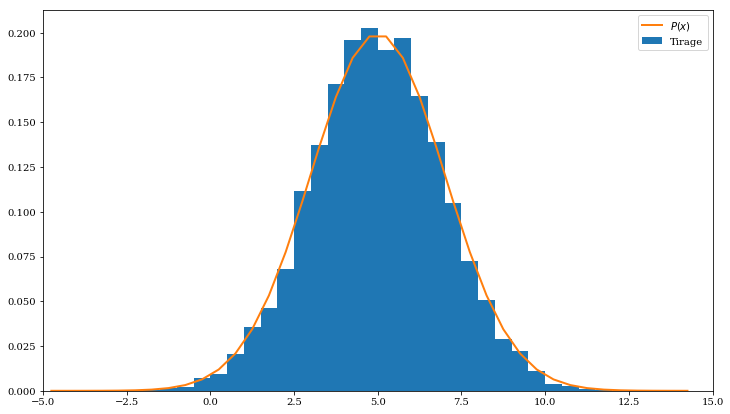

In [6]:
# Définition des constantes
mu = 5
sigma = 2
N = 10000

# Génération des N nombres aléatoires
x = np.random.normal(mu,sigma,N)

# Histogramme
plt.figure(figsize=(12,7))
binwidth = 0.5
plt.xlim(-5, 15)
bins=np.arange(-5,15., binwidth)
plt.hist(x,bins,density = True,label="Tirage")

# Courbe théorique
xc = bins[:-1] + binwidth/2
plt.plot(xc,1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(xc-mu)**2/(2*sigma**2)), lw=2,label = "$P(x)$")
plt.legend();

Y-a-t-il d'autres myens que d'utiliser cette focntion déjà toute faite ? Il doit nécessairement en avoir un. Pour cela, nous nous baserons sur des propriétés mathématique set non informatiques. En effet, la **méthode de rejection de Von Neumann** exploite le fait que si une série de nombre est générée à partir d'une certaine distribution $p_1(x)$ alors il est possible de sélectionner certains, afin de mettre en evidence une seconde série, distribuée selon une seconde distribution $p_2(x)$. Ceci n'est possible que à condition qu'il existe une certaine contante $K$ telle que

$$p_2(x) \leq K p_1(x)~\forall x.$$

Comment se fait la sélection ? La règle est la suivante : le nombre $x$ est gardé si $U<\frac{p_2(x)}{Kp_1(x)}$, où $U$ est un nombre aléatoire uniformément distribué dans dans l'interval $(0,1)$. La justification de ce critère est dans le MOOC.

Appliquons cette méthode pour mettre en évidence une série Gaussienne centrée réduite ($\mu = 0$ et $\sigma = 1$) d'une série exponentielle de paramètre $\alpha = 1$. Dans notre cas, $K = 1.4$ fonctionne.

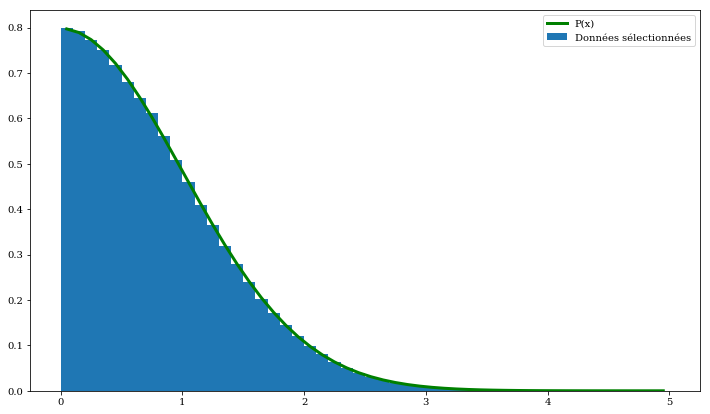

In [7]:
# Définition des constantes
N = 1000000
K = 1.4
alpha = 1
mu = 0
sigma = 1

# Distribution exponetielle
u1 = np.random.random_sample(N)
u2 = -1/alpha*np.log(1-u1)

# Probabilités p_1(x) et p_2(x)
p_1 = alpha*np.exp(-alpha*u2)
p_2 = 2/np.sqrt(2*np.pi*sigma)*np.exp(-(u2-mu)**2/(2*sigma**2)) # l'ajout du facteur est nécessaire pour la normaisation de la noramle positive

# Série de nombres aléatoires U
U_list = np.random.random_sample(N)

# Condition de sélection
condition = U_list < p_2 / (K*p_1)

# Sélection
selected_points = np.extract(condition,u2)

# Histogramme
plt.figure(figsize=(12,7))
binwidth=0.1
bins=np.arange(0.,5.1, binwidth)
plt.hist(selected_points,bins,density='true',label="Données sélectionnées");

# Courbe théorique
xc = bins[:-1] + binwidth/2
p_xc = 2/np.sqrt(2*np.pi*sigma)*np.exp(-(xc-mu)**2/(2*sigma**2))
plt.plot(xc,p_xc,lw=3,color='green',label="P(x)")
plt.legend();

Les résultats sont très satisfaisants.

## 2.6 Algorithme de Box-Muller

Dans cette section nousa allons voir une troisième méthode de généré des nombres aléatoires distribués selon la loi normale : la **transformée de Box-Muller**. On parle de l'**algorithme de Box-muller** lorsqu'on implémente cette transformée par un algorithme.

Soient $X_1$ et $X_2$ deux variables alétoires uniformément distribuées sur l'interval $]0,1]$. La transformée de Box-Muller des ces variables donne alors deux nouvelles variables indépendantes $Y_1$ et $Y_2$ définies comme

\begin{align}
    Y_1 &= \sqrt{-2\ln{X_1}}\cos{2\pi X_2} \\
    Y_2 &= \sqrt{-2\ln{X_1}}\sin{2\pi X_2}
\end{align}

Dans ce cas, $Y_1$ et $Y_2$ sont distribuées selon la loi normale centrée réduite. Le code suivant implémente directement cette transformation et permet de voir la distribution de $Y_1$ et $Y_2$.

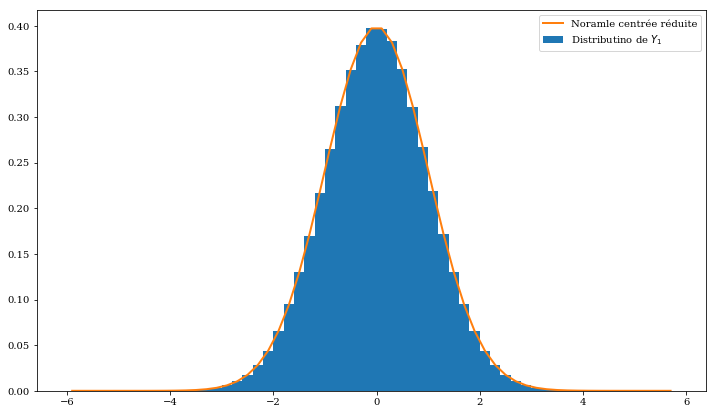

In [8]:
# Définition des constantes
N= 1000000

# Définition des variables aléatoires uniformément distribuées
X_1 = np.random.random_sample(N)
X_2 = np.random.random_sample(N)

# Définition des variables transformées
Y_1 = np.sqrt(-2*np.log(X_1))*np.cos(2*np.pi*X_2)
Y_1 = np.sqrt(-2*np.log(X_1))*np.sin(2*np.pi*X_2)

# Histogramme
plt.figure(figsize=(12,7))
binwidth = 0.2
bins=np.arange(-6.0,6.0, binwidth)
plt.hist(Y_1,bins,density=True,label="Distributino de $Y_1$")

# Courbe théorique
xc = bins[:-1] + binwidth/2
plt.plot(xc,1/np.sqrt(2*np.pi)*np.exp(-xc**2/2), lw=2,label="Noramle centrée réduite")
plt.legend();

Notons que les varibales `X_1` et `X_2` sont distribuées uniformément sur l'intervalle $[0,1[$ au lieu de $]0,1]$. De si petit changement sur l'interval n'ont pas de conséquences sur la distribution.

Pour mieux comprendre pourquoi ca fonctionne, il est nécessaire de voir coment se transforme la loi normale centrée réduite en coordonnées polaires.

$$\frac{1}{2\pi}e^{-\frac
{x^2+y^2}{2}dxdy} = \frac{1}{2\pi}e^{-\frac{r^2}{2}}rdrd\theta = \underbrace{\frac{1}{2}e^{-\frac{s}{2}}}_{p_s(s)}~ds~\underbrace{\frac{1}{2\pi}}_{p_\theta(\theta)}~d\theta$$

où l'on a posé $s=r^2$. On voit donc bien qu'un distribution noramle centrée réduite est équivalent à deux distribution indépendantes : une exponentielle de paramètre $\alpha = \frac{1}{2}$ et une uniforme sur $[0,2\pi]$. Ce qui justfie bien la forme de la transformation de Box-Muller donnée plus haut.

# 3. Marche aléatoire

## 3.1 Premier modèle de diffusion

Dans cette section nous allons étudier le phénomène de diffusion d'un certains liquide $A$ dans un second liquide $A$. Plus concrètement, on analyse l'évolution de la position de certaines particules de $A$ au cours du temps. Etant donné qu'il n'est pas possible, ou en tout cas pas efficace, de tenir compte de la position de toutes les particules d'un volume de liquide macroscopique, nous considérerons que les particules de $A$ sont sujettes à une marche aléatoire. C'est-à-dire qu'à chaque instant, la particule évolue dans une direction donnée par une certaine distribution. Commencons juste par introduire le sujet avec l'exemple donné dans le cours.

Pour simplifier le modèle, nous traiterons le cas à une dimension d'espace (répéré par la position $x$) et nous discrétiserons le temps en intervalles $dt$. De manière générate, on a donc

$$x(t+dt) = x(t) + dx$$

et le terme $dx$ dépendra d'un paramètre aléatoire. Prenons le cas simple où

$$dx = \sqrt{2\alpha dt}\cal{N(0,1)}$$

où $\alpha$ est un certains coefficient de diffusion. Le code suivant permet alors simuler la position en fonction du temps pour une telle diffusion avec $\alpha = 2$, une position initale $x(0) = 0$ et pendant un temps $T = 10$ s. Notons que la finesse de discrétisation du temps est donnée par un paramètre `nt` arbitraire. PLus ce paramèter augment, plus la similation sera récise, mais plus long sera l'éxécution du code.

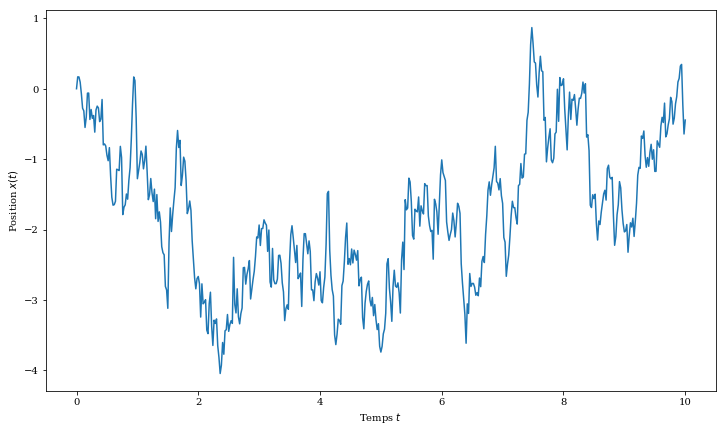

In [9]:
# Définition des constantes
T=10.0
nt=500
alpha=2.0
dt=T/nt

# Echelle de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)

# Position initiale
x[0]=0

# Evolution de la position
for i in range(nt):
    x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1)

    
# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position $x(t)$")
plt.plot(t,x);

On voit directement que pour ce type de diffusion, le comprtement est très différents à chaque simulation. On ne voit pas de comportement émanant apparaitre pour l'instant. Pour rendre cela plus évident, suivons maintenant l'évolution de la position d'un nombre `N` de particules initalement positionnée selon une loi gaussienne centrée réduite. 

**Note :** Les code suivant ne sont que des simples ré-adapations du code précédent mais nous les introduisons ici pour ce modèle de diffusion basique pour ne plus avoir besoin d'en discutter lors de cas plus complexes.

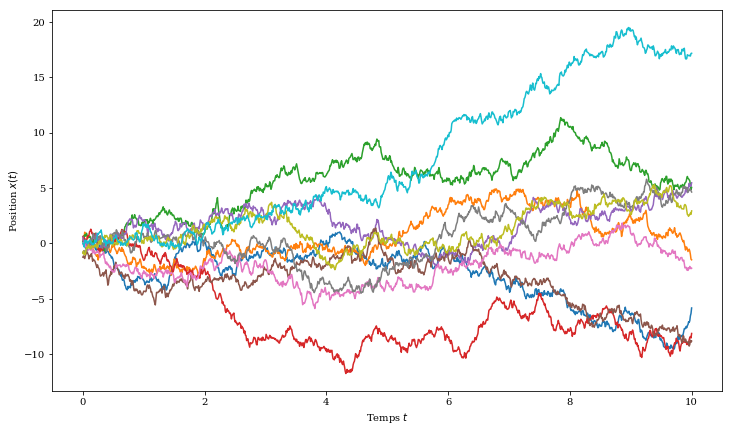

In [10]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 10

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Position initale
x[0] = np.random.normal(0,1,N)

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        
# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position $x(t)$")
for i in range(N):
    plt.plot(t,x[:,i])

On voit clairement qu'il y a effctivement diffusion mais aucun autre comportement particulier n'émerge. Pour mieux voir le phénomène de diffusion, on peut représenter la distribution initale et la distribution finale. On voit bien que la première distribution s'est écrasée au cours du temps. On voudra cependant le faire avec plus de données pour que l'histogramme soit représentatif.

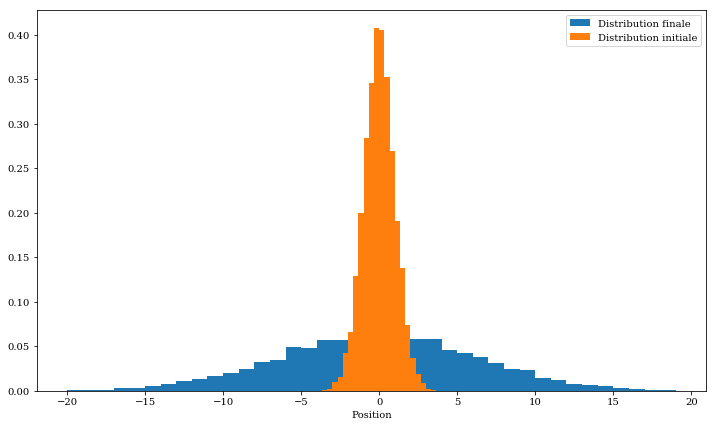

In [11]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 10000

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Position initale
x[0] = np.random.normal(0,1,N)

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)

# Histogramme
binwidth = 1
bins=np.arange(-20.0,20.0, binwidth)
plt.figure(figsize=(12,7))
plt.xlabel("Position")
plt.hist(x[-1],bins,density=True,label = "Distribution finale");
plt.hist(x[0],bins/3,density=True,label = "Distribution initiale");
plt.legend();

Comment peut-on quantifier ce que l'on voit? C'est-à-dire comment quantifier le fait que le distribution ne subit pas de translation, mais qu'elle s'applatit ? Pour voir qu'il n'y a pas de translation, il suffit de voir comment varie la **position moyenne** (le centre de la distribution) au cours de la diffusion.

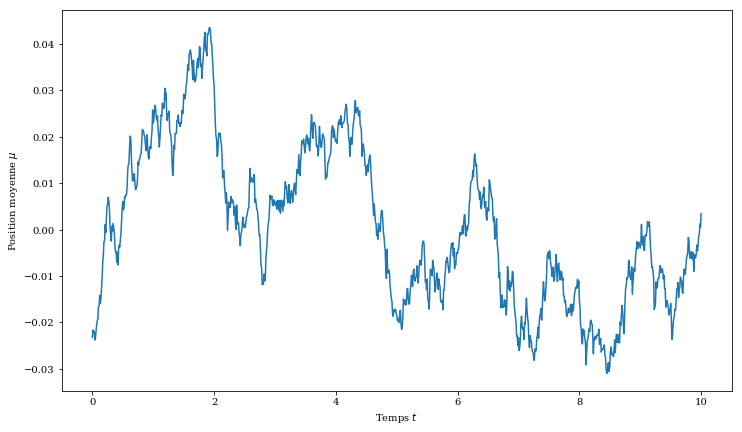

In [12]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 10000

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Positions moyennes
means = []

# Position initale
x[0] = np.random.normal(0,1,N)
means.append(np.mean(x[0]))

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        means.append(np.mean(x[i+1]))

# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position moyenne $\mu$")
plt.plot(t,means);

Malgré l'apparence du dernier graphique, on voit que la position moyenne ne varie que très peu par rapport aux échelles caractéristiques du problème. On le voir en calculant la variance de la position moyenne.

In [13]:
np.var(means)

0.000287742610496549

Alors que les échelles de grandeurs du problème (variance de la distribution finale et initale) sont typiquement de l'ordre de l'unité.

On peut maintenant répété le même principe mais cette foit pour la **variance de la distribution** de position au cours du temps, ce qui nous permettra de mettre en évidence la diffusion, c'est-à-dire l'applatissement des distributions.

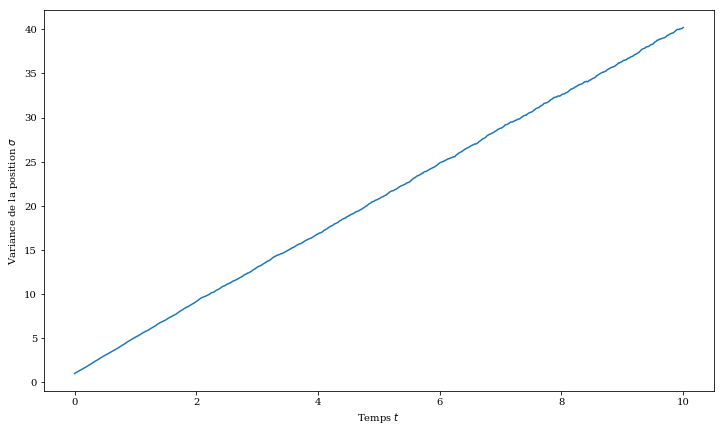

In [14]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 10000

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Positions moyennes
var = []

# Position initale
x[0] = np.random.normal(0,1,N)
var.append(np.var(x[0]))

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        var.append(np.var(x[i+1]))

# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Variance de la position $\sigma$")
plt.plot(t,var)

De nouveau, la diffusion est claire. De plus, comme on le voit ci-dessous, la variance de la variance de la position est très grande. Ceci dit, ce dernier argument ne permet que d'affirmer que les distribution change de "largeur" mais pas pour autant que c'est bien une diffusion. Effectivement, on pourrait tout à fait imaginer dont la variance oscille ou alors aurait un comportement tout à fait chaotique. Mais le graphique ci-dessus permet bien de voir que la variance de la position est strictement croissante, et à un rythme constant, ce qui indentifie bien la diffusion.

In [15]:
np.var(var)

128.26694479846086

Si l'on est ferru de beaux graphiques, il est même possible de représenter la distribution de la position en fonction du temps. Pour que ce graphie soit plus lisible, nous ne représentons pas la distribution à chaque étape mais plutot toute les quelques dizaines d'étapes.

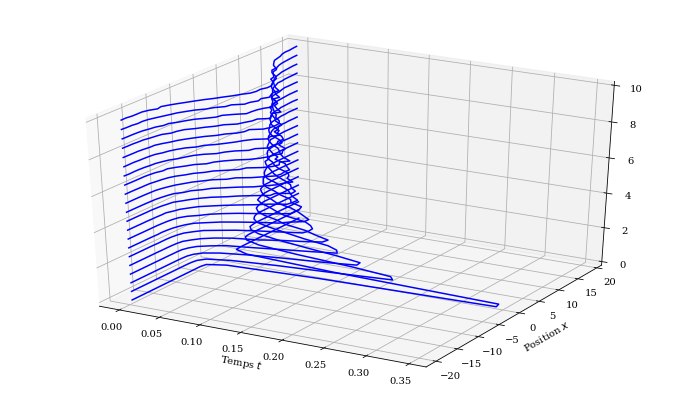

In [16]:
# Définition des du nombre de dt entre chauqe courbe tracée
step = 50

# Définition des données nécessaire pour utiliser np.hist
binwidth = 1
bins=np.arange(-20.0,20.0, binwidth)

# Coordonnées pour les axes position et temps
x_coords = bins[:-1] + binwidth/2
t_coords = np.arange(0,T+dt,dt)

# Coordonnée pour le dernier axe : hauteur des bins
z_coords = []
for i in range(0,nt+1,step):
    z_coords.append(np.histogram(x[i],bins,density=True)[0])

# Graphique 3d
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel('Temps $t$')
ax.set_ylabel('Position $x$')
for i in range(len(z_coords)):
    plt.plot(z_coords[i],x_coords,t_coords[i*step],color="blue")
plt.show()
plt.close()

## 3.2 Deuxième modèle de diffusion : translation

Voyons maintenant un second modèle de diffusion, cette dois le changement de position est donné par 

$$dx=cdt+\sqrt{2\alpha dt}\cal{N(0,1)}$$

où $c$ est une constante dont on analysera l'influence plus tard. Notons que le cas $c = 0$ est celui que l'on vient de discutter, il peut donc être pris comme un cas particulier du modèle que l'on analyser maintenant. La différence fondamentale avec le modèle précédent est le terme $cdt$ qui introduit un déplacement constant à chaque étape indépendamment second terme qui est lui aléatoire. Une petie modification du premier code permet tout de suite de voir le comportement d'une particule.

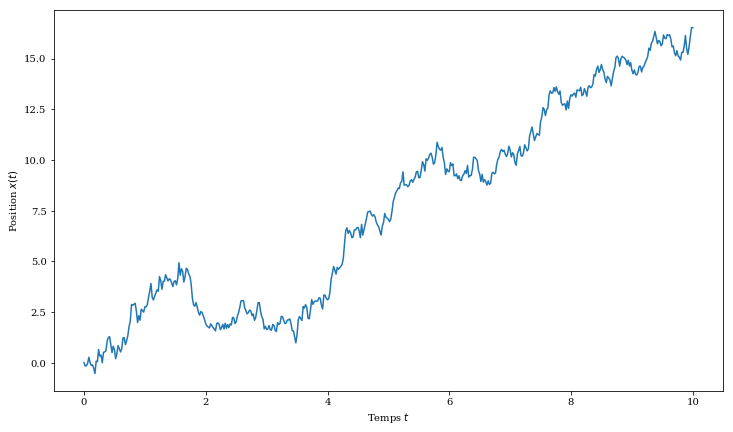

In [17]:
# Définition des constantes
T=10.0
nt=500
alpha=2.0
c = 1.0
dt=T/nt

# Echelle de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)

# Position initiale
x[0]=0

# Evolution de la position
for i in range(nt):
    x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1)

    
# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position $x(t)$")
plt.plot(t,x);

Exécuter cette cette dernière cellule plusieurs fois permet de se convaincre qu'il y a bien un effet de translation vers les $x$ positifs qui n'était pas présent avant. Ceci vient bien sûr du terme $cdt$ comme on s'y attendait. Passons directement à l'analyse du comportement de masse, toujours pour une position initale générée selon une loi gaussienne centrée réduite.

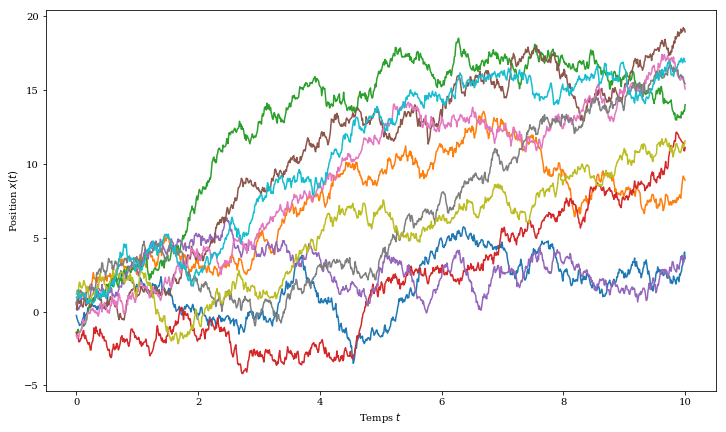

In [18]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 10
c = 1.0
alpha=2.0

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Position initale
x[0] = np.random.normal(0,1,N)

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        
# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position $x(t)$")
for i in range(N):
    plt.plot(t,x[:,i])

On voit clairement la tendance générale à se diriger vers les $x$ positifs. Cela se visualise bien si l'on représente la distribution initale et la distribution finale sur un même graphique.

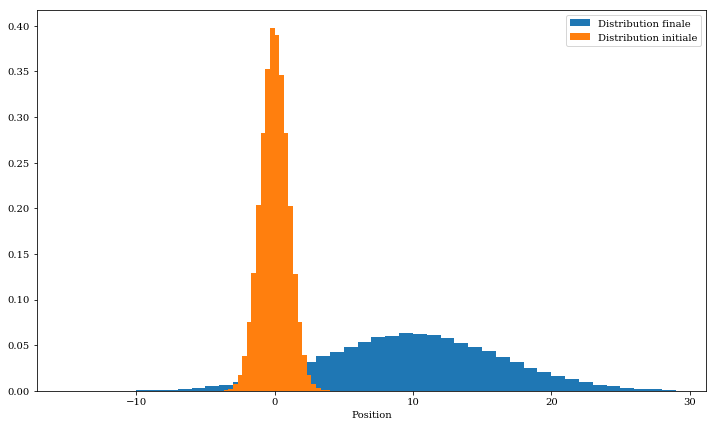

In [19]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 100000
c = 1.0
alpha=2.0

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Position initale
x[0] = np.random.normal(0,1,N)

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)

# Histogramme
binwidth = 1
bins=np.arange(-15.0,30.0, binwidth)
plt.figure(figsize=(12,7))
plt.xlabel("Position")
plt.hist(x[-1],bins,density=True,label = "Distribution finale");
plt.hist(x[0],bins/3,density=True,label = "Distribution initiale");
plt.legend();

Comme à notre habitude, voici un joli graphique permettant de bien visualiser la postion des particule au cours du temps.

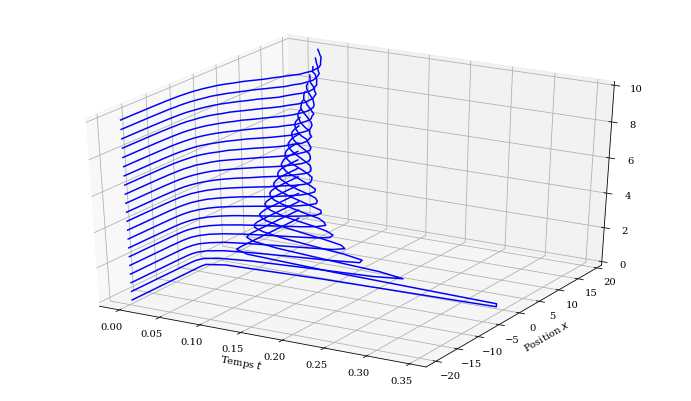

In [20]:
# Définition des du nombre de dt entre chauqe courbe tracée
step = 50

# Définition des données nécessaire pour utiliser np.hist
binwidth = 1
bins=np.arange(-20.0,20.0, binwidth)

# Coordonnées pour les axes position et temps
x_coords = bins[:-1] + binwidth/2
t_coords = np.arange(0,T+dt,dt)

# Coordonnée pour le dernier axe : hauteur des bins
z_coords = []
for i in range(0,nt+1,step):
    z_coords.append(np.histogram(x[i],bins,density=True)[0])

# Graphique 3d
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel('Temps $t$')
ax.set_ylabel('Position $x$')
for i in range(len(z_coords)):
    plt.plot(z_coords[i],x_coords,t_coords[i*step],color="blue")
plt.show()
plt.close()

La translation est très claire. Mais comment quantifier cette translation ? De la même maière que pour la section précédente : observer la moyenne et la variance de la position. Cependant, au lieu de simplement observer ces quantités pour $c$ fixé, nous allons plutot observer comment elles varient en fonction de $c$ ce qui nous permmetra de confirmer notre intruition sur le rôle de $c$ dans ce modèle de diffusion. On commence par simplement définir une fonction qui retourne les positions moyennes en fonction du temps pour un $c$ fixé.

In [63]:
def RW_mean_position(alpha,c,T,nt,N):
    # Définition des constantes
    dt = T/nt
    means = []
    
    # Echelle des positions
    x = np.zeros((nt+1,N))
    
    # Conditions initales
    x[0] = np.random.normal(0,1,N)
    means.append(np.mean(x[0]))
    
    # Evolution de la position et de la moyenne
    for i in range(nt):
        x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        means.append(np.mean(x[i+1]))
    
    return means

Ensuite nous utilisons cette fonction pour plusieurs valeurs de $c$. Notons qu'il n'est pas nécessaire que $c$ prenne des valeurs négatives car cela aura uniquement pour effet de retourner les résultats pour $c$ positif par rapport à l'axe $x = 0$. Ce n'est vrai que parce que la normale $\cal{N(0,1)}$ présent dans l'expression de $dx$ est paire.

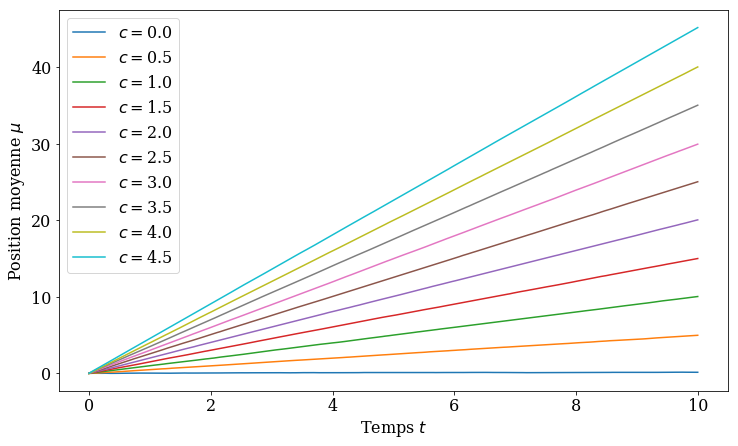

In [64]:
# Définition des constantes
T = 10.0
nt = 1000
N = 10000
alpha=2.0
data = []

# Domaine de variation de c
c_range = np.arange(0.,5.0,0.5)

# Génération des données pour plusieurs valeurs de c
for c in c_range:
    data.append(RW_mean_position(alpha,c,T,nt,N))

# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position moyenne $\mu$")
for i in range(len(data)):
    plt.plot(t,data[i],label="$c = $"+str(c_range[i]))
plt.legend();

Le graphqiue précédent montre d'une part que plus $c$ augmente, plus la distribution des positions se déplace rapidement vers les $x$ positifs et d'autre par que pour $c$ fixé, on a bien une diffusion classique (à justifier avec la variance de la posiion) couplée avec un effet de translation.

Analysons le comportement de la varaince de la position en fonction du temps et en fonction de $c$. On commence, comme cour la moyenne, par définir une fonction donnant la variance en fonction du temps pour une valeur de $c$ fixée.

In [65]:
def RW_var_position(alpha,c,T,nt,N):
    
    # Définition des constantes
    dt = T/nt
    var = []
    
    # Echelle des positions
    x = np.zeros((nt+1,N))
    
    # Conditions initlaes
    x[0] = np.random.normal(0,1,N)
    var.append(np.var(x[0]))
    
    # Evolution du système et de la variance
    for i in range(nt):
        x[i+1]=x[i]+c*dt+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)
        var.append(np.var(x[i+1]))
    
    return var

Vient ensuite l'utilisation de cette fonction pour plusieurs valeurs de $c$.

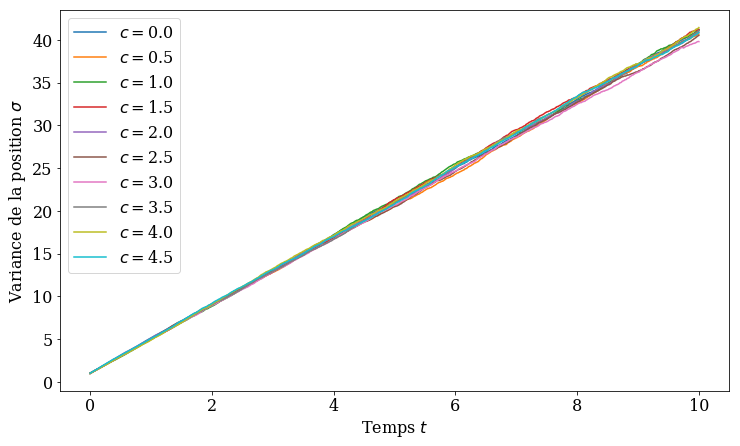

In [66]:
# Définition des constantes
T = 10.0
nt = 1000
N = 10000
alpha=2.0
data = []

# Domaine de variation de c
c_range = np.arange(0.,5.0,0.5)

# Génération des données pour plusieurs valeurs de c
for c in c_range:
    data.append(RW_var_position(alpha,c,T,nt,N))

# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Variance de la position $\sigma$")
for i in range(len(data)):
    plt.plot(t,data[i],label="$c = $"+str(c_range[i]))
plt.legend();

On conclu que : $c$ n'a as d'impact significatif sur la l'étalement de la distribution de position, c'est-à-dire sur la vitesse de diffusion (coefficient angulaire sur le graphe ci-dessus) et que on a bien affaire à une diffusion classique (même type de diffusion que dans le premier cas) pour chaque valeur de $c$.

Maintenant qu'on s'est dévloppé une intuition sur le rôle de $c$, fixons $c$ à 1, et étudions l'évolution de la distribution de la position plus en détail. D'après les deux graphe précédents, on voit que la position moyenne et la variance évoluent à vitesses constantes ($v_\mu$ pour la position moyenne et $v_\sigma$, pour la variance de la position). Pour connaitre à quelle vitesse changent ses quantités, il suffit de déterminer les coeffcients angulaire des droites correspondantes. Nous utilisons la fonction `stats.linregress` de scipy qui retourne un tableau contenant le coefficeint angulaire, l'ordonnée à l'origine, le coefficeint $R^2$ et encore d'autres valeurs relatives à la régression linéaire des données par la méthode des moindres carrés.

In [69]:
# Définition des constantes
T = 10.0
nt = 1000
N = 10000
alpha=2.0
c = 1.0

# Echelle de temps
t = np.arange(0,T+dt,dt)

# Calcul de la position moyenne et de la variance en fonction du temps
mean_pos = RW_mean_position(alpha,c,T,nt,N)
var_pos = RW_var_position(alpha,c,T,nt,N)

# Calcul du coefficeint angulaire des droite des schémas préccédent
mean_stats = stats.linregress(t,mean_pos)
var_stats = stats.linregress(t,var_pos)

# Affichage du résultat
print("La position moyenne se déplace à la vitesse : ",mean_stats[0],"unité de position/unité de temps")
print("La variance de la position croît à la vitesse : ",var_stats[0],"unité de position/unité de temps")

La position moyenne se déplace à la vitesse :  1.00177772105 unité de position/unité de temps
La variance de la position croît à la vitesse :  3.89008720393 unité de position/unité de temps


Est-ce qu'on peut vérifier à quelle point l'évolution de la moyenne et de la variance sont bien linéaire (vitesse constante) ? Oui, pour cela il suffit d'afficher la qualité du fit, c'est-à-dire le coefficeint $R^2$.

In [70]:
print("Pour la position moyenne : ",mean_stats[2])
print("Pour la variance de la position : ",var_stats[2])

Pour la position moyenne :  0.999967898318
Pour la variance de la position :  0.999947632432


Les coefficients sont bien proches de $1$ ce qui atteste de la linéarité.

Comment expliquer les valeurs de $v_\mu$ et $v_\sigma$ ? Il est facile de se convaincre que le terme $cdt$ dans l'expression de $dx$ n'influence pas la variance, donc l'évolution de la variance est la même que pour le cas du MOOC, c'est-à-dire 

$$\sigma^2(t) = 2\alpha t + \sigma^(0) $$

donc le coeffcieitn angulaire est donné par 

$$v_\sigma = 2\alpha = 4$$

ce que l'on a trouvé est bien proche de cette valeur théorique.

## 3.3 Troisième modèle de diffusion : friction

Le troisième et dernier modèle de diffusion que nous allons étudions ici a un déplacement infinitésimale définit par 

$$dx=-\gamma x dt + \sqrt{2\alpha dt}\cal{N(0,1)}$$

où $\gamma$ est une contante appelée **constante de friction**. On verra dans la suite si l'on peut se saire une intuition à propos du rôle de ce coefficient. Notons que la cas $\gamma = $ (dit **sans friction**) correspond au premier modèle de diffusion, qui peut donc être considéré comme un cas particulier de ce modèle-ci.

La différence fondamentale de ce modèle avec les précédents est la dépendance est la position du déplacement infinitésimale en plus de la dépendance en le temps qui étatit déjà présente dans le deuxième modèle. Comment se faire une intiotion a priori du type de mouvement que cela va causer ? Comme la position $x$ multiplie $dt$, on peut s'attendre à ce que plus un particule s'éloigne de $x = 0$, plus la dépendance en le temps (régie par le paramètre $c$ dans le modèle précédent) soit forte. C'est-à dire que les particules les plus éloignées de $x = 0$ seront les plus "translatées". Notons bien que cela introduit une position absolu dans le système, la position $x=0$ ayant un roe particulier, le système n'est plus invariant sous translation.

Nous verrons dans la suite si ces prédictions s'avèrent exactes.

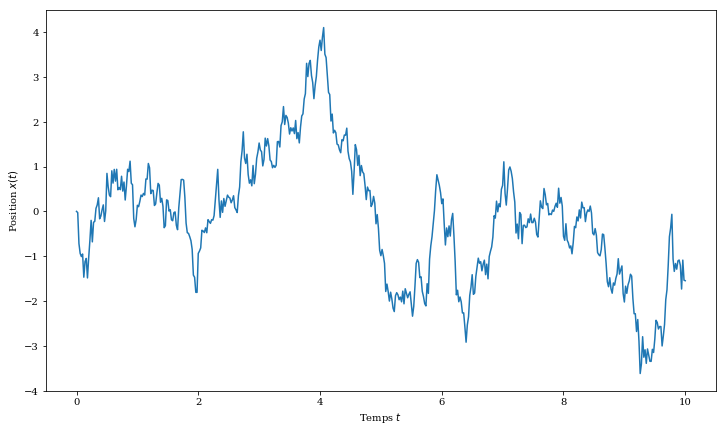

In [25]:
# Définition des constantes
T=10.0
nt=500
alpha=2.0
gamma = 1.0
dt=T/nt

# Echelle de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.empty(nt+1)

# Position initiale
x[0]=0

# Evolution de la position
for i in range(nt):
    x[i+1]=x[i]-gamma*dt*x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1)

    
# Graphique
plt.figure(figsize=(12,7))
plt.xlabel("Temps $t$")
plt.ylabel("Position $x(t)$")
plt.plot(t,x);

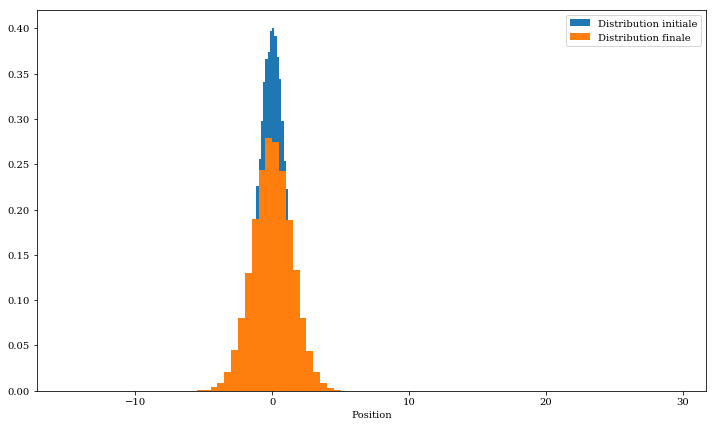

In [58]:
# Définition des constantes
T = 10.0
nt = 1000
dt = T/nt
N = 100000
gamma = 1.0
alpha=2.0

# Echelles de temps et de positions
t = np.arange(0,T+dt,dt)
x = np.zeros((nt+1,N))

# Position initale
x[0] = np.random.normal(0,1,N)

# Evolution de le position
for i in range(nt):
        x[i+1]=x[i]-gamma*dt*x[i]+np.sqrt(2*alpha*dt)*np.random.normal(0,1,N)

# Histogramme
binwidth = 0.5
bins=np.arange(-15.0,30.0, binwidth)
plt.figure(figsize=(12,7))
plt.xlabel("Position")
plt.hist(x[0],bins/3,density=True,label = "Distribution initiale");
plt.hist(x[-1],bins,density=True,label = "Distribution finale");
plt.legend();

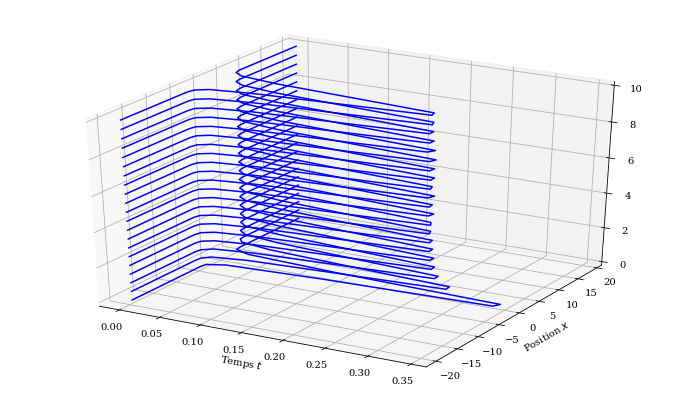

In [61]:
# Définition des du nombre de dt entre chauqe courbe tracée
step = 50

# Définition des données nécessaire pour utiliser np.hist
binwidth = 1
bins=np.arange(-20.0,20.0, binwidth)

# Coordonnées pour les axes position et temps
x_coords = bins[:-1] + binwidth/2
t_coords = np.arange(0,T+dt,dt)

# Coordonnée pour le dernier axe : hauteur des bins
z_coords = []
for i in range(0,nt+1,step):
    z_coords.append(np.histogram(x[i],bins,density=True)[0])

# Graphique 3d
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(111, projection='3d')
ax.grid()
ax.set_xlabel('Temps $t$')
ax.set_ylabel('Position $x$')
for i in range(len(z_coords)):
    plt.plot(z_coords[i],x_coords,t_coords[i*step],color="blue");
    #plt.plot(x_coords,t_coords[i*step],z_coords[i],color="blue");

plt.show()
plt.close()

# 4. Modèle d'Ising

Le modèle d'Ising permet de modéliser différents phénomènes issus d'effets collectifs entre des particules à deux états possibles (nous nous consacrerons au spin dans ce travail) et les particules avoisinantes. Nous expliquerons plus tard ce qu'il est nécessaire de connaitre sur ce dernier mais pour l'instant on va se concentrer sur **l'algorithme de Metropolis**. Imaginons vouloir étudier un système de 10000 particules (carré de 100 particules de côté) pouvant prendre deux états distincts. Le nombre de configuration possible est $2^10000\sim10^3010$. On voit bien que, rien que pour un petit système (nous somme très loin du nombre d'Avogadro), il est impossible de calculer tout les états possibles du système. Cela veut-il dire qu'il est impossible de calculer des statistiques du système ? L'algorithme de Metropolis combiné à un petit peu de physique statistique permet de contourner ce problème.



In [28]:
nx=10
ny=10

# Non-dimensional coupling constant J/(kb*T)
alpha = 0.1

# Initial spins at each site
sp = np.load('initial_state.npy')
print(sp)

plt.figure(figsize=(6,6))
plt.imshow(sp,interpolation="none",origin='lower');

FileNotFoundError: [Errno 2] No such file or directory: 'initial_state.npy'

In [ ]:
def energy_at_site(sp,alpha,sigma,ix,iy):
    """ Computes the contribution to the energy for a given spin
    at location ix,iy for a lattice with periodic boundary conditions
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    sigma   : int
        spin at site ix,iy
    ix   : int
        location in x
    iy   : int
        location in y
    
   
    Returns:
    -------
    energy: energy for the given configuration
    """
    
    energy=-alpha*sigma*(sp[(ix-1)%nx,iy]+sp[(ix+1)%nx,iy]+sp[ix,(iy-1)%ny]+sp[ix,(iy+1)%ny])

    return energy

In [ ]:
def metropolis_at_site(sp,alpha,ix,iy):
    """ Flips a dipole at site ix, iy when probability condition is met 
   
    Parameters:
    ----------
    sp: numpy array
        array of spins
    alpha  : real
        coupling constant J/(kb*T)
    ix   : int
        location in x
    iy   : int
        location in y
    """
    sigma=sp[ix,iy]
    energy_before_flip = energy_at_site(sp,alpha,sigma,ix,iy)
    sigma = -sigma
    energy_if_site_flipped = energy_at_site(sp,alpha,sigma,ix,iy)
    
    # Flip the site with Metropolis probability
    # Condition is always satisifed if dE < 0
    if (np.random.random_sample()<np.exp(-(energy_if_site_flipped \
                                               -energy_before_flip))):
        sp[ix,iy]=-sp[ix,iy]

In [ ]:
NMC = 100000
states = np.empty(NMC+1)
states[0]=sp[5,5]

for n in range(0,NMC):
    metropolis_at_site(sp,alpha,5,5)
    states[n]=sp[5,5]

ups = np.extract(states==1, states).size
downs = NMC - ups
print(ups/downs)

# Références

* MOOC : [Practical Numerical Methods with Python](https://openedx.seas.gwu.edu/courses/course-v1:MAE+MAE6286+2017/about)
* Page wikipedia de la loi normale : https://fr.wikipedia.org/wiki/Loi_normale
* Page wikipedia de la méthode de Box-Muller : https://en.wikipedia.org/wiki/Box%E2%80%93Muller_transform
* Page wikipedia sur le modèle d'Ising : https://en.wikipedia.org/wiki/Ising_model
* Page de documentation officielle de numpy : https://docs.scipy.org/doc/numpy/user/quickstart.html
* Page de documentation officielle de pyplot : https://matplotlib.org/api/pyplot_api.html
* Implémentation de LineCollection officielle de matplotlib : https://matplotlib.org/gallery/lines_bars_and_markers/multicolored_line.html